In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statistics import mean
import math

## Example 2
### Construct the model

$$X_1 \sim \mathcal{N}(0,\sigma^2)$$
$$Y= X_1+\varepsilon_y$$
$$X_2=Y+\varepsilon_2$$
$$\varepsilon_2 \sim \mathcal{N}(0,1)$$
$$\varepsilon_y \sim \mathcal{N}(0,\sigma^2)$$

$$\tilde{P}^{\sigma}(dX_1,dX_2,dY)=P(dX_1)W_{X_1}(dX_2)Q_{X_1}^{\sigma}(dy)$$ 
The linear regression model is equivariant.

The invariant loss function is $$MSE=\frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$$.



In [161]:
def coef_1(n,sigma,g1):
    X1=np.random.normal(0, sigma, n)+g1 #intervention on X1 in environment 1
    Y=X1+np.random.normal(0,sigma, n)
    X2=Y+np.random.normal(0, 1, n)
    X=np.hstack([X1.reshape(-1,1)])
    y=np.hstack([Y.reshape(-1,1)])
    reg=LinearRegression().fit(X, y)  #fit the linear regression with only X1
    return np.append(reg.coef_,reg.intercept_)

In [162]:
def coef_2(n,sigma,g2):
    X1=np.random.normal(0, sigma, n)
    Y=X1+np.random.normal(0,sigma, n)
    X2=Y+np.random.normal(0, 1, n)+g2 #intervention on X2 in environment 1(for X2)
    X=np.hstack([X2.reshape(-1,1)]) #fit the linear regression with only X2
    y=np.hstack([Y.reshape(-1,1)])
    reg=LinearRegression().fit(X, y)  
    return np.append(reg.coef_,reg.intercept_)

In [163]:
def risk_function1(n,sigma,a,iterate,g1):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n)+a #intervention on X1
        Y=X1+np.random.normal(0,sigma, n)
        #X2=Y+np.random.normal(0, 1, n)
        #X=np.hstack([X1.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X1*coef_1(n,sigma,g1)[0]+coef_1(n,sigma,g1)[1] #use the coefficients and intercept in envronment 1 for X1 to make prediction
        list0.append(sum((Y-pred)**2)/n) 
    return sum(list0)/(iterate-1)

In [164]:
def risk_function2(n,sigma,b,iterate,g2):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n) 
        Y=X1+np.random.normal(0,sigma, n)
        X2=Y+np.random.normal(0, 1, n)+b #intervention on X2
        X=np.hstack([X2.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X2*coef_2(n,sigma,g2)[0]+coef_2(n,sigma,g2)[1]  #use the coefficients and intercept in envronment 1 for X2 to make prediction
        list0.append(sum((Y-pred)**2)/n) 
        list0.append(sum((Y-pred)**2)/n) 
    return sum(list0)/(iterate-1)

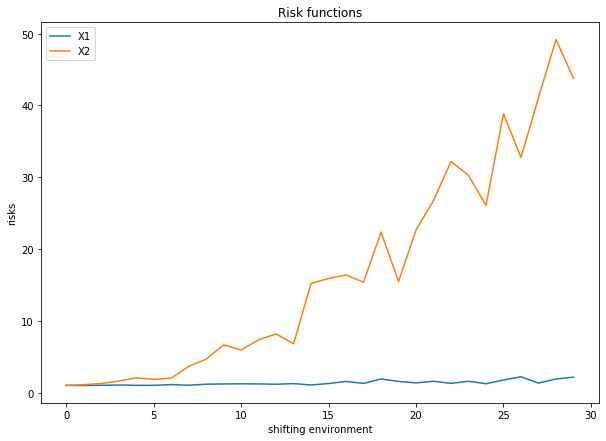

In [166]:
list1=[]
list2=[]


for a in np.linspace(1., 10., 30): #different environments on X1
    list1.append(risk_function1(100,1,a, 11,g1=1))
    
   
for b in np.linspace(10., 20., 30): #different environments on X2
    list2.append(risk_function2(100,1,b, 11,g2=10))
    
    
    
plt.figure(figsize=(10,7))
   
plt.plot(list1,label='X1')
plt.plot(list2,label='X2')
plt.xlabel("shifting environment")
plt.ylabel("risks")

plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()

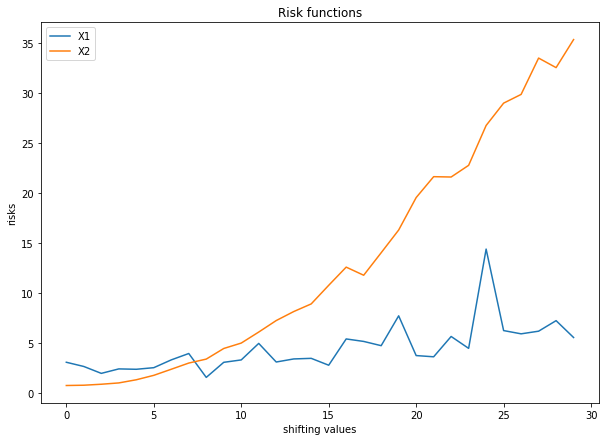

In [167]:
list1=[]
list2=[]


for a in np.linspace(10., 20., 30): #different environments on X1
    list1.append(risk_function1(100,1,a, 11,g1=10))
    
   
for b in np.linspace(1., 10., 30): #different environments on X2
    list2.append(risk_function2(100,1,b, 11,g2=1))
    
    
    
plt.figure(figsize=(10,7))
   
plt.plot(list1,label='X1')
plt.plot(list2,label='X2')
plt.xlabel("shifting values")
plt.ylabel("risks")

plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()